In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
data = pd.read_csv("BlackFriday.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
married_women = data[(data['Marital_Status'] == 1) & (data['Gender'] == 'F')]

In [8]:
unmarried_women = data[(data['Marital_Status'] == 0) & (data['Gender'] == 'F') & (data['Age'] != '0-17')]

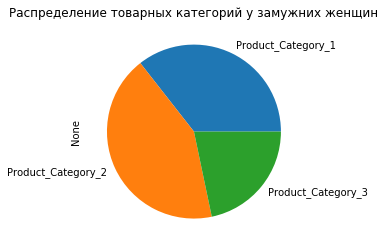

In [10]:
married_women[['Product_Category_1','Product_Category_2','Product_Category_3']].sum().plot(kind='pie', title="Распределение товарных категорий у замужних женщин")
plt.show()

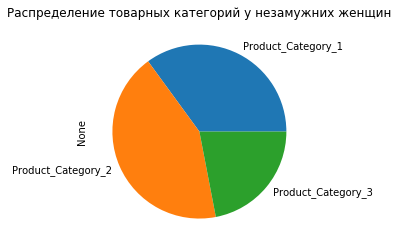

In [11]:
unmarried_women[['Product_Category_1','Product_Category_2','Product_Category_3']].sum().plot(kind='pie',title="Распределение товарных категорий у незамужних женщин")
plt.show()

In [12]:
married_women['User_ID'].nunique()

719

In [13]:
unmarried_women['User_ID'].nunique()

869

In [14]:
print('Ниже считаю считаю средний чек по замужним и незамужним женщинам. Делю на кол-во уникальных User_ID, т.к. у многих есть по несколько покупок.')

Ниже считаю считаю средний чек по замужним и незамужним женщинам. Делю на кол-во уникальных User_ID, т.к. у многих есть по несколько покупок.


In [15]:
married_women['Purchase'].sum()/married_women['User_ID'].nunique()

682626.2920723227

In [16]:
unmarried_women['Purchase'].sum()/unmarried_women['User_ID'].nunique()

727260.1864211737

In [17]:
married_women_grouped = married_women.groupby(['Age'], as_index=False).sum()

In [18]:
married_women_grouped[['Age','Purchase']]

,Age,Purchase
0,18-25,48904272
1,26-35,179393032
2,36-45,90618116
3,46-50,87683684
4,51-55,55777007
5,55+,28432193


In [19]:
unmarried_women_grouped = unmarried_women.groupby(['Age'], as_index=False).sum()

In [20]:
unmarried_women_grouped[['Age','Purchase']]

,Age,Purchase
0,18-25,153305178
1,26-35,254464648
2,36-45,148392364
3,46-50,27113309
4,51-55,32195400
5,55+,16518203


Средняя сумма покупки по возрастным группам у замужних женщин

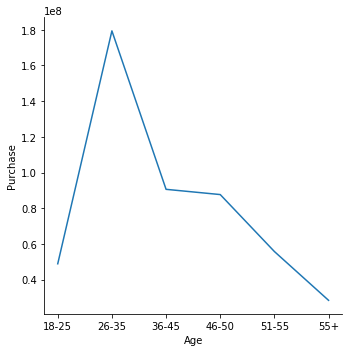

In [40]:
sns.relplot(x="Age", y="Purchase", kind="line", ci="sd", data=married_women_grouped);

Средняя сумма покупки по возрастным группам у незамужних женщин

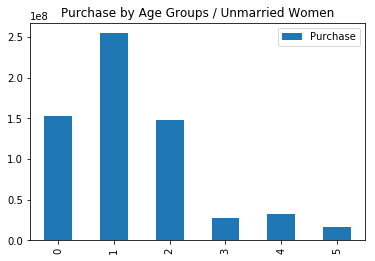

In [166]:
unmarried_women_grouped[['Age','Purchase']].plot(kind='bar', title="Purchase by Age Groups / Unmarried Women")
plt.show()

Распределение средней суммы покупки у мужчин и женщин

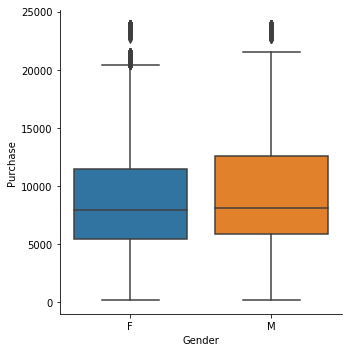

In [41]:
sns.catplot(x="Gender", y="Purchase", kind="box", data=data);

In [52]:
purchase_by_age_and_gender = data.groupby(['Age','Gender'], as_index=False).sum()
purchase_by_age_and_gender[['Age','Gender','Purchase']]

,Age,Gender,Purchase
0,0-17,F,41826615
1,0-17,M,90832391
2,18-25,F,202209450
3,18-25,M,699459830
4,26-35,F,433857680
5,26-35,M,1565891426
6,36-45,F,239010480
7,36-45,M,771639085
8,46-50,F,114796993
9,46-50,M,298621230


Распределение суммы покупок во возрастным группам у мужчин и женщин

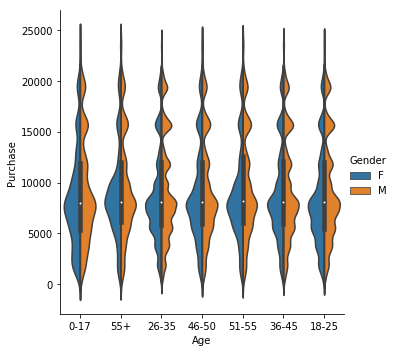

In [69]:
sns.catplot(x="Age", y="Purchase", hue="Gender", kind="violin", split=True, data=data)

Распределение суммы покупки по возрастным группам в зависимости от семейного положение (на первых 10тыс, т.к. долго грузится)

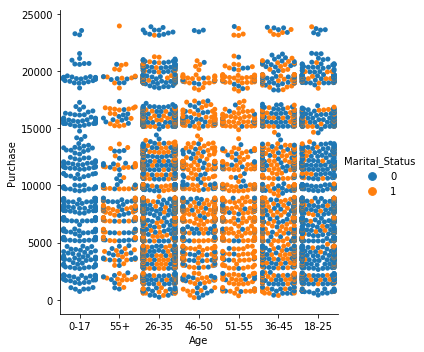

In [71]:
sns.catplot(x="Age", y="Purchase", hue="Marital_Status", kind="swarm", data=data[0:10000])